# Week 2 Assignment
##Overview
The following is a simple exploratory data analysis of the GapMinder data set as part of the Coursera Data Management and Visualization course.  In this analysis I would like to examine the relationship between the economic well-being of a society and the level of democratization.

## About the Data
The data for this analysis comes from a subset of the GapMider project data.

### Income per Person
In order to measure the economic well-being I will be using GDP per capita data.  This originally came from the World Bank.  It is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.  The data are in constant 2000 US Dollars.  The GapMinder data set that I will be analyzing is the 2010 GDP per capita.

### Democracy Score
The democracy score comes from the Polity IV project.  It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.  The GapMinder data set that I will analyzing is the polity score for 2009.

##Preprocessing the Data
I begin by importing the libraries needed for the analysis:

In [1]:
# Import libraries needed
import pandas as pd
from ggplot import *

Now I have python parse the csv file and print out some basic statistics about the data frame (df):

In [2]:
# Read in the Data
df = pd.read_csv('gapminder.csv', low_memory=False)

# Print some basic statistics
n = str(len(df))
cols = str(len(df.columns))
print('Number of observations: '+ n +' (rows)')
print('Number of variables: '+ cols +' (columns)')

Number of observations: 213 (rows)
Number of variables: 16 (columns)


There are 213 observations with 16 variables in the data frame.  I need to clean up the raw data prior to the analysis.  I will first change the varaible types for the variables of interst:

In [3]:
# Change the data type for variables of interest
df['polityscore'] = df['polityscore'].convert_objects(convert_numeric=True)
df['incomeperperson'] = df['incomeperperson'].convert_objects(convert_numeric=True)

##Exploratory Data Analysis
### 2009 Democracy Score
The first variable of interest it the polityscore variable.  This variable is a measure of the level of openess of the country.  It ranges from -10 (an autocracy) to 10 (full democracy).

In [4]:
print('Value counts')
polity_counts = df.groupby('polityscore').size()
print(polity_counts)

Value counts
polityscore
-10     2
-9      4
-8      2
-7     12
-6      3
-5      2
-4      6
-3      6
-2      5
-1      4
 0      6
 1      3
 2      3
 3      2
 4      4
 5      7
 6     10
 7     13
 8     19
 9     15
 10    33
dtype: int64


In [5]:
print('Value percentages')
polity_percents = polity_counts * 100 / len(df)
print(polity_percents)

Value percentages
polityscore
-10     0.938967
-9      1.877934
-8      0.938967
-7      5.633803
-6      1.408451
-5      0.938967
-4      2.816901
-3      2.816901
-2      2.347418
-1      1.877934
 0      2.816901
 1      1.408451
 2      1.408451
 3      0.938967
 4      1.877934
 5      3.286385
 6      4.694836
 7      6.103286
 8      8.920188
 9      7.042254
 10    15.492958
dtype: float64


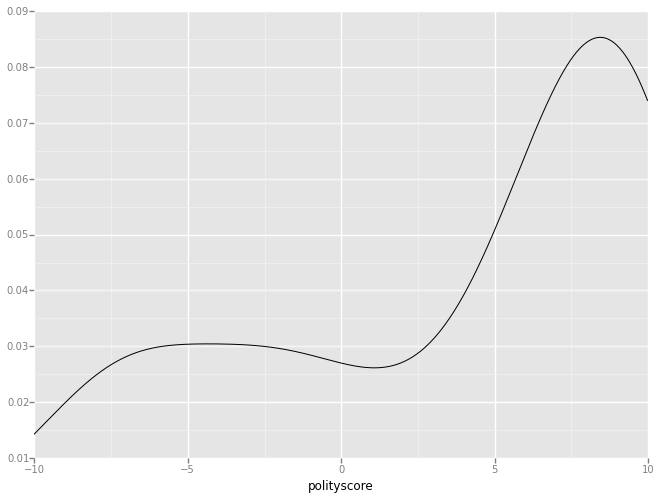

<ggplot: (34690543)>


In [6]:
%matplotlib inline
polity_plot = ggplot(df, aes(x='polityscore')) + geom_density()
print(polity_plot)

###2010 GDP Per Person
The second variable of interest is the measure of economic well-being.  It is the 2010 percapita GDP denoted in 2000 US dollars.  Since GDP per person is a continuous varible and I want a discrete one. I will create quintiles:

In [7]:
df['incomequantiles'] = pd.cut(df['incomeperperson'], 5, labels=['one','two','three','four','five'])

Now that the income quantiles are formed, I can calculate frequencies:

In [8]:
print('Value counts')
incomequantiles_counts = df.groupby('incomequantiles').size()
print(incomequantiles_counts)

Value counts
incomequantiles
one      162
two       24
three      2
four       1
five       1
dtype: int64


In [9]:
print('Value percentages')
incomequantiles_percents = incomequantiles_counts * 100 / len(df)
print(incomequantiles_percents)

Value percentages
incomequantiles
one      76.056338
two      11.267606
three     0.938967
four      0.469484
five      0.469484
dtype: float64


##Next Steps
I do want to simplify since there are 21 values ranging from -10 to 10.  Using the definitions created by the authors (online at: [http://www.systemicpeace.org/polity/polity4.htm|http://www.systemicpeace.org/polity/polity4.htm]) these categories can be mapped into 5 categories as shown below:

![polity categories](http://www.systemicpeace.org/polity/demmap13.jpg)